# Generate Single Dose-Response Curve
The following will demo how to calculate the IC50 for a given drug response and generate single dose-response curve.  

This tutorial will use dummy data found under '../dataset' folder. The calculation requires inputs from a DataFrame. As shown, only specific information is needed to run the calculations. Finally, issues with the IC50 calculation and how to overcome it will be explored. 

In [1]:
import pandas as pd
from py50.calculate import Calculate
from py50.plotcurve import PlotCurve

Read in a dataset. 

In [2]:
df = pd.read_csv('../dataset/single_example.csv')
df.head()

,Compound Name,Compound Conc,% Inhibition 1,% Inhibition 2,% Inhibition Avg
0,Drug 1,100000.0,90,94,92
1,Drug 1,33300.0,97,89,93
2,Drug 1,11100.0,86,89,88
3,Drug 1,3700.0,81,88,84
4,Drug 1,1240.0,63,70,67


### Calculate IC50

The input dataframe will need to be converted to the Calculate class. The dataframe can also be printed for viewing and checking.  

In [3]:
data = Calculate(df)
data.show()

,Compound Name,Compound Conc,% Inhibition 1,% Inhibition 2,% Inhibition Avg
0,Drug 1,100000.0,90,94,92
1,Drug 1,33300.0,97,89,93
2,Drug 1,11100.0,86,89,88
3,Drug 1,3700.0,81,88,84
4,Drug 1,1240.0,63,70,67
5,Drug 1,412.0,36,47,41
6,Drug 1,137.0,22,11,16
7,Drug 1,45.7,-4,-3,-3
8,Drug 1,15.2,11,-3,4
9,Drug 1,5.0,-14,-11,-12


Currently, the program will only function on developing an IC50 from an average only. 
py50 requires a column containing the following:
- drug name
- concentration
- response average

Column names is needed as follows:

In [4]:
ic50 = data.calculate_ic50(name_col='Compound Name', concentration_col='Compound Conc', response_col='% Inhibition Avg')
ic50

,compound_name,maximum,minimum,ic50 (nM),hill_slope
0,Drug 1,92.854428,-7.640263,439.823988,1.040875


### Plotting
py50 contains functions that will allow plotting. Let's plot the dummy dataset.
This time the dataframe will need to be convereted into the PlotCurve class.
From there, calculations will occur and extracted for plotting.  

In [5]:
plot_data = PlotCurve(df)
# The input dataset can be inspected as follows:
# data.show()

Plotting the dose-response curve uses the single_curve_plot() function. The aim of writing this function was to give the user more control on how they want the final graph to look like. By default, py50 will assume drug concentrations are in nanomolar (nM) concentration and will convert them into micromolar (µM) concentrations. This will also mean that the scale on the x-axis will be in µM. And as this is dose response vary greatly in concentrations, the scale of the concentration will be in log format. However, depending on user needs, these can be changed. 

For this example, barebone arguments are given to generate the plot. If you are interested in more information, the documentation can be found here. 

Further examples will be given below:

Assume Drug 1 Concentration is in nM


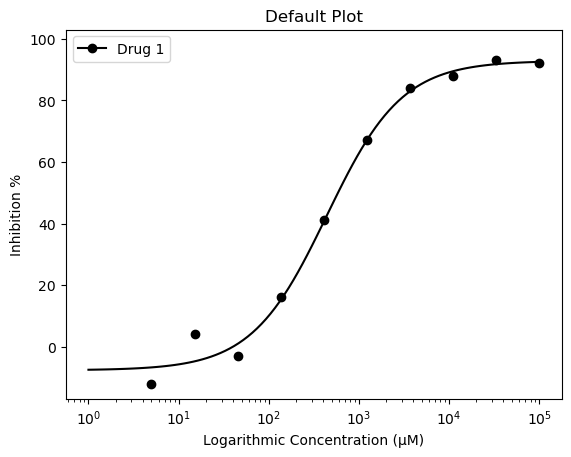

In [6]:
figure = plot_data.single_curve_plot(concentration_col='Compound Conc',
                                     response_col='% Inhibition Avg',
                                     plot_title='Default Plot',
                                     drug_name='Drug 1',
                                     xlabel='Logarithmic Concentration (µM)',
                                     ylabel='Inhibition %',
                                     legend=True,
                                     output_filename=None)

figure

### Customize figure

There are several ways to customize the line graph. Personally I prefer colored figures. This can be adjusted by adding the "line_color=" argument. Line color can be a specific color name (i.e. red, blue, green, etc) or a hex code. Here is an example of a colored line in "teal" (#008080)

Assume Drug 1 Concentration is in nM


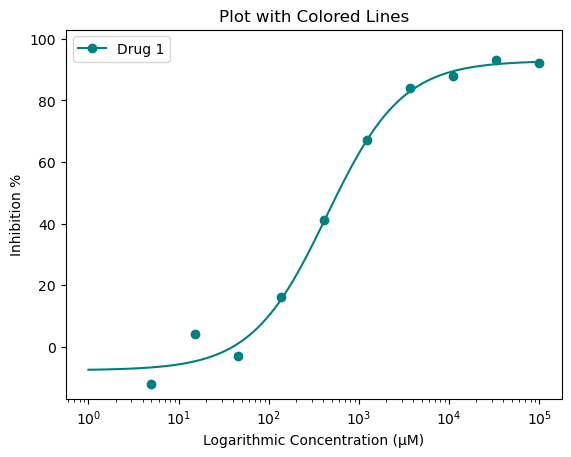

In [7]:
figure = plot_data.single_curve_plot(concentration_col='Compound Conc',
                                     response_col='% Inhibition Avg',
                                     plot_title='Plot with Colored Lines',
                                     drug_name='Drug 1',
                                     xlabel='Logarithmic Concentration (µM)',
                                     ylabel='Inhibition %',
                                     line_color='#008080',
                                     legend=True,
                                     output_filename=None)

figure

That doesn't look half bad! But what if you want to highlight the IC50 value? That would give people a quick way to identify where the IC50 lies on the curve. That can be achieved using the "box=" argument. The box argument is a boolean argument and by default it will draw a box to the IC50 on the curve.


Assume Drug 1 Concentration is in nM


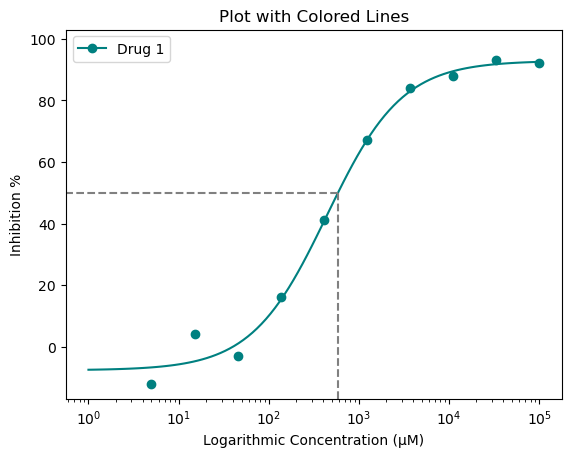

In [8]:
figure = plot_data.single_curve_plot(concentration_col='Compound Conc',
                                     response_col='% Inhibition Avg',
                                     plot_title='Plot with Colored Lines',
                                     drug_name='Drug 1',
                                     xlabel='Logarithmic Concentration (µM)',
                                     ylabel='Inhibition %',
                                     line_color='#008080',
                                     box=True,
                                     legend=True,
                                     output_filename=None)

figure

The box highlight can be further modified for color and specific response position you may be interested in. For example, what if you want the box to be red and also highlight IC$_{60}$ or IC$_{90}$? This can be achieved by using the "box_intercept=" and "box_color=" arguments.

Assume Drug 1 Concentration is in nM


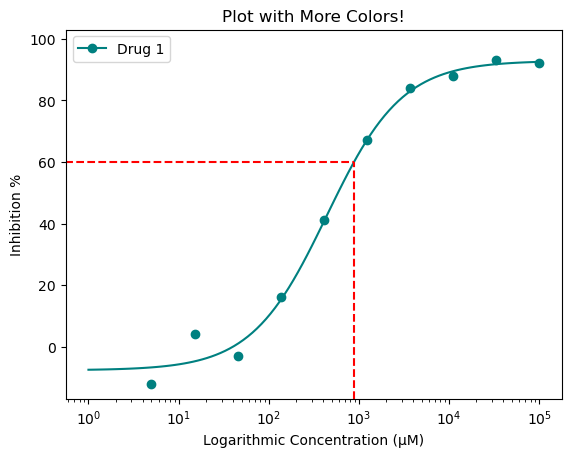

In [9]:
figure = plot_data.single_curve_plot(concentration_col='Compound Conc',
                                     response_col='% Inhibition Avg',
                                     plot_title='Plot with More Colors!',
                                     drug_name='Drug 1',
                                     xlabel='Logarithmic Concentration (µM)',
                                     ylabel='Inhibition %',
                                     line_color='#008080',
                                     box=True,
                                     box_intercept=60,
                                     box_color='red',
                                     legend=True,
                                     output_filename=None)

figure

Finally, the x-axis can be further adjusted. 

The scale can be changed from log to linear using the "xscale=" argument, changing the shape of the curve from sigmoid to a normal curve. The units of the scale can be changed to nM using the "xscale_unit=" argument. Currently only µM and nM is used. 

Concentration on X-axis is in nM
nM with ticks constraints!


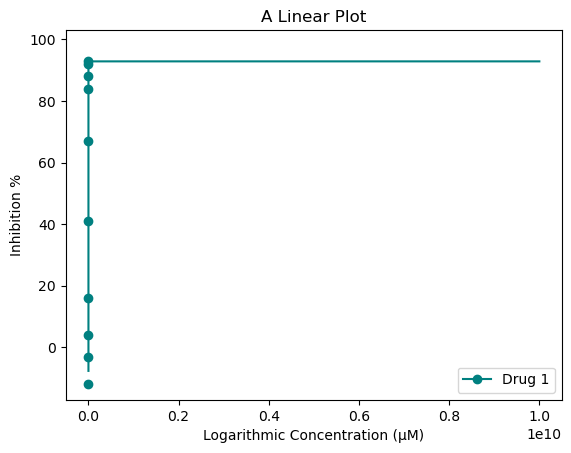

In [10]:
figure = plot_data.single_curve_plot(concentration_col='Compound Conc',
                                     response_col='% Inhibition Avg',
                                     plot_title='A Linear Plot',
                                     drug_name='Drug 1',
                                     xlabel='Logarithmic Concentration (µM)',
                                     ylabel='Inhibition %',
                                     line_color='#008080',
                                     box=False,
                                     legend=True,
                                     xscale='linear',
                                     xscale_unit='nM',
                                     xscale_ticks=(-2.5, 10),
                                     output_filename=None)

figure

Notice how this graph the xscale_ticks was also adjusted to fit the concentration in nM scale. This was achieved using the "xscale_ticks=" argument. Note that the xscale_ticks will affect how the line curve is drawn and should be adjusted to fit the dataset on the plot. 

Concentration on X-axis is in nM
nM with ticks constraints!


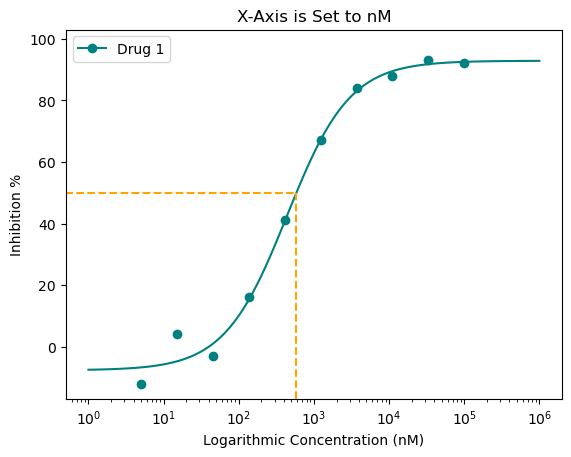

In [11]:
figure = plot_data.single_curve_plot(concentration_col='Compound Conc',
                                     response_col='% Inhibition Avg',
                                     plot_title='X-Axis is Set to nM',
                                     drug_name='Drug 1',
                                     xlabel='Logarithmic Concentration (nM)',
                                     ylabel='Inhibition %',
                                     line_color='#008080',
                                     box=True,
                                     box_color='orange',
                                     legend=True,
                                     xscale='log',
                                     xscale_unit='nM',
                                     xscale_ticks=(0, 6),
                                     output_filename=None)

figure

### Saving the figure
Finally, the figure can be saved using the "output_filename=" argument. Change "None" to file path of choice. Image should save in .png format.  

Concentration on X-axis is in nM
nM with ticks constraints!


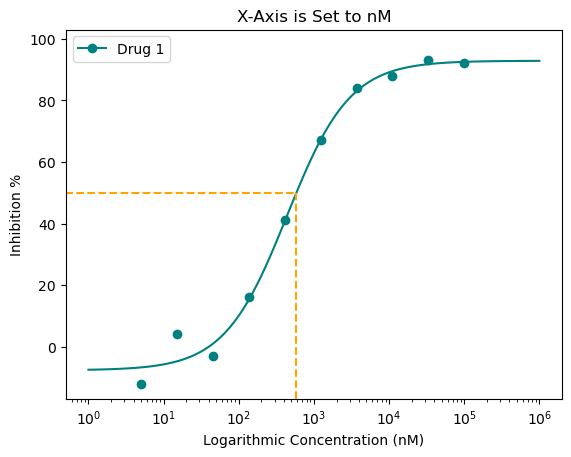

In [12]:
figure = plot_data.single_curve_plot(concentration_col='Compound Conc',
                                     response_col='% Inhibition Avg',
                                     plot_title='X-Axis is Set to nM',
                                     drug_name='Drug 1',
                                     xlabel='Logarithmic Concentration (nM)',
                                     ylabel='Inhibition %',
                                     line_color='#008080',
                                     box=True,
                                     box_color='orange',
                                     legend=True,
                                     xscale='log',
                                     xscale_unit='nM',
                                     xscale_ticks=(0, 6),
                                     output_filename=None)

figure